In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Data Analysis

In [2]:
df =  pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [6]:
df.isnull().sum()/df.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(730, 16)

In [9]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [10]:
df['dteday'] = pd.to_datetime(df['dteday'],format="%d-%m-%Y")

# Data Pre-Processing

In [11]:
df['season'] = df['season'].astype("str")
df['season'] = df['season'].apply(lambda x : x.replace('1','Spring'))
df['season'] = df['season'].apply(lambda x : x.replace('2','Summer'))
df['season'] = df['season'].apply(lambda x : x.replace('3','Fall'))
df['season'] = df['season'].apply(lambda x : x.replace('4','Winter'))


In [12]:
df['weathersit'] = df['weathersit'].astype("str")
df['weathersit'] = df['weathersit'].apply(lambda x: x.replace("1","Clear"))
df['weathersit'] = df['weathersit'].apply(lambda x: x.replace("2","Mist"))
df['weathersit'] = df['weathersit'].apply(lambda x: x.replace("3","light Snow"))
df['weathersit'] = df['weathersit'].apply(lambda x: x.replace("4","Heavy Rain"))


In [13]:
df['yr'] = df['yr'].map({0: 2018, 1: 2019})

In [14]:
df['mnth'] = df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [15]:
season = pd.get_dummies(df['season'],dtype='int',drop_first=True)
season

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [16]:
year = pd.get_dummies(df['yr'],dtype='int',drop_first=True)
year

,2019
0,0
1,0
2,0
3,0
4,0
...,...
725,1
726,1
727,1
728,1


In [17]:
month = pd.get_dummies(df['mnth'],dtype='int',drop_first=True)
month

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [18]:
weathersit = pd.get_dummies(df['weathersit'],dtype='int',drop_first=True)
weathersit

,Mist,light Snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


In [19]:
weekday = pd.get_dummies(df['weekday'],prefix='weekday',dtype='int',drop_first=True)
weekday

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,1,0
727,0,0,0,0,0,1
728,0,0,0,0,0,0


In [20]:
df_1 = pd.concat([df,season,year,month,weathersit,weekday],axis=1)

In [21]:
 df_1.shape

(730, 39)

In [22]:
df_new = df_1.drop(['instant','dteday','season','yr','mnth','weathersit','weekday','casual','registered'],axis=1)

In [23]:
df_new.shape

(730, 30)

In [24]:
df_new.columns

Index([   'holiday', 'workingday',       'temp',      'atemp',        'hum',
        'windspeed',        'cnt',     'Spring',     'Summer',     'Winter',
               2019,        'Aug',        'Dec',        'Feb',        'Jan',
              'Jul',        'Jun',        'Mar',        'May',        'Nov',
              'Oct',        'Sep',       'Mist', 'light Snow',  'weekday_1',
        'weekday_2',  'weekday_3',  'weekday_4',  'weekday_5',  'weekday_6'],
      dtype='object')

In [25]:
df_new.columns = df_new.columns.astype('str')

# Data Visualization

<Axes: xlabel='temp', ylabel='Density'>

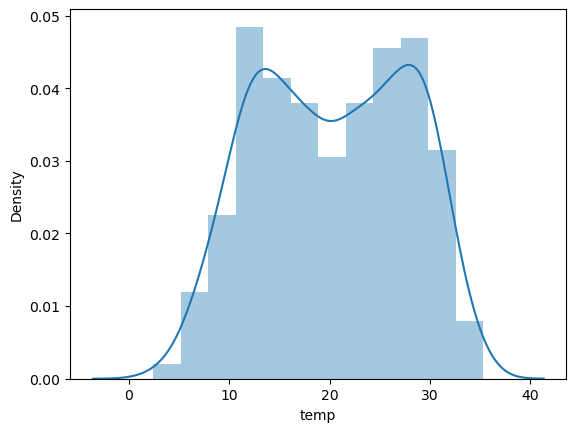

In [26]:
sns.distplot(df['temp'],kde=True)

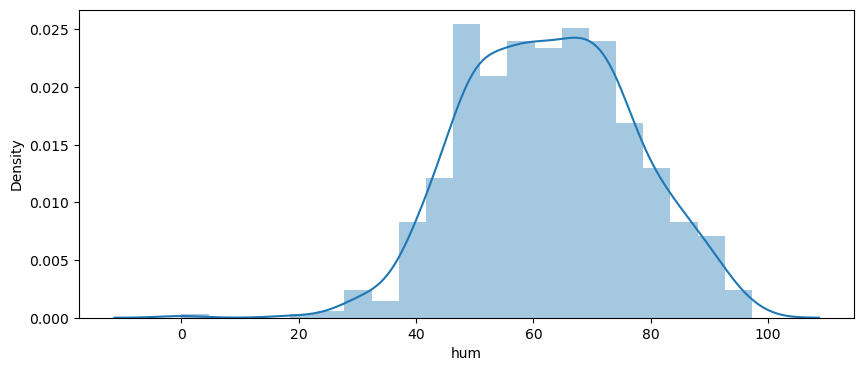

In [27]:
plt.figure(figsize=(10,4))
sns.distplot(df['hum'],kde=True);

<Axes: xlabel='windspeed', ylabel='Density'>

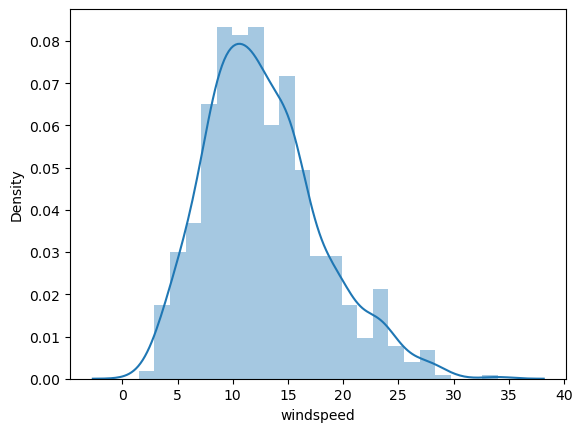

In [28]:
sns.distplot(df['windspeed'],kde=True)

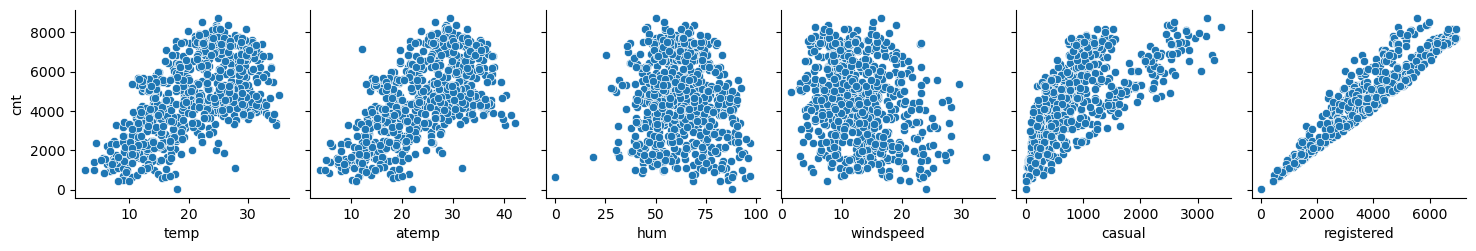

In [29]:
sns.pairplot(df,x_vars =['temp','atemp','hum','windspeed','casual','registered'],y_vars='cnt',kind='scatter');

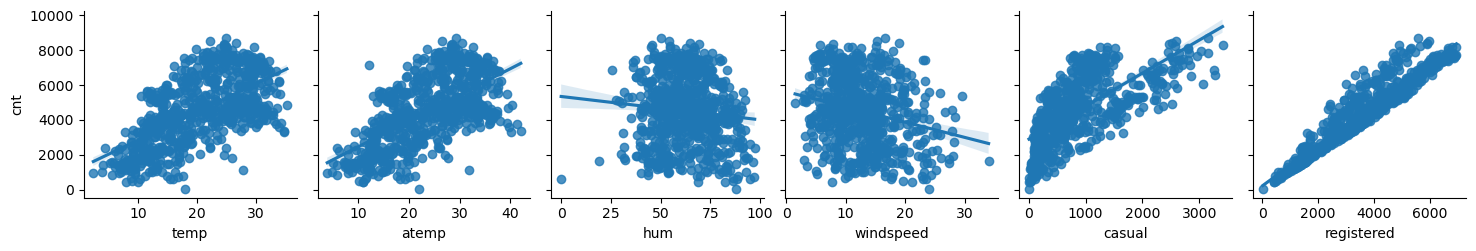

In [30]:
sns.pairplot(df,x_vars =['temp','atemp','hum','windspeed','casual','registered'],y_vars='cnt',kind='reg');

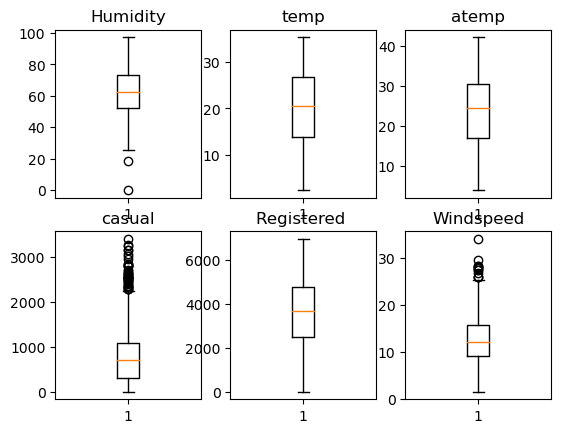

In [31]:
figure,axis = plt.subplots(2,3)
axis[0,0].boxplot(df['hum'])
axis[0,0].set_title('Humidity')
axis[0,1].boxplot(df['temp'])
axis[0,1].set_title('temp')
axis[0,2].boxplot(df['atemp'])
axis[0,2].set_title('atemp')

axis[1,0].boxplot(df['casual'])
axis[1,0].set_title('casual')
axis[1,1].boxplot(df['registered'])
axis[1,1].set_title('Registered ')
axis[1,2].boxplot(df['windspeed']);
axis[1,2].set_title('Windspeed');

In [32]:
reg = df_new[['atemp','temp','hum','windspeed','Spring','Summer','Winter','cnt','holiday']].corr()

<Axes: >

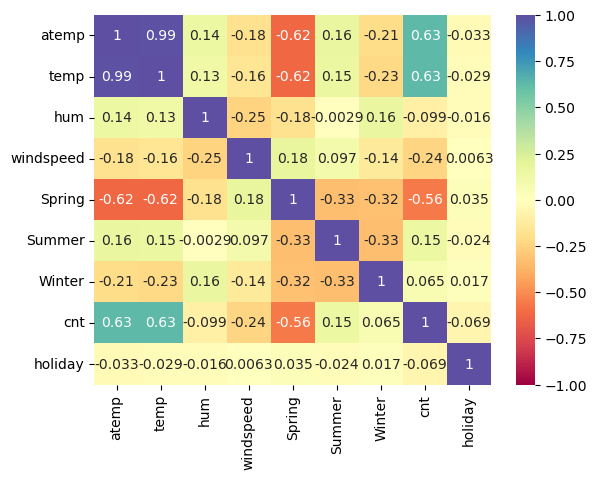

In [33]:
sns.heatmap(reg,annot=True,cmap='Spectral',vmin=-1,vmax=1)

# Splitting Data into train and test data

In [34]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, test_size = 0.3, random_state = 100)

In [35]:
from sklearn.preprocessing import Normalizer
num_vars = ['temp','atemp','hum','cnt','windspeed']
scaler = Normalizer()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
y_train = df_train.pop('cnt')
X_train = df_train

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   holiday     510 non-null    int64  
 1   workingday  510 non-null    int64  
 2   temp        510 non-null    float64
 3   atemp       510 non-null    float64
 4   hum         510 non-null    float64
 5   windspeed   510 non-null    float64
 6   Spring      510 non-null    int32  
 7   Summer      510 non-null    int32  
 8   Winter      510 non-null    int32  
 9   2019        510 non-null    int32  
 10  Aug         510 non-null    int32  
 11  Dec         510 non-null    int32  
 12  Feb         510 non-null    int32  
 13  Jan         510 non-null    int32  
 14  Jul         510 non-null    int32  
 15  Jun         510 non-null    int32  
 16  Mar         510 non-null    int32  
 17  May         510 non-null    int32  
 18  Nov         510 non-null    int32  
 19  Oct         510 non-null    int32

# RFE (Recursive Feature Elimination)

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,n_features_to_select=24)             
rfe = rfe.fit(X_train, y_train)


In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('2019', True, 1),
 ('Aug', False, 3),
 ('Dec', False, 6),
 ('Feb', True, 1),
 ('Jan', False, 5),
 ('Jul', False, 4),
 ('Jun', True, 1),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', False, 2),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Mist', True, 1),
 ('light Snow', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1)]

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', '2019', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Sep',
       'Mist', 'light Snow', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

In [42]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Jan', 'Jul', 'Nov'], dtype='object')

# Building Model

In [43]:
X_train_rfe = X_train[col]

In [44]:
X_train_rfe

,holiday,workingday,temp,atemp,hum,windspeed,Spring,Summer,Winter,2019,...,Oct,Sep,Mist,light Snow,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
653,0,1,0.002549,0.003058,0.007411,0.001620,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0
576,0,1,0.004053,0.004593,0.009758,0.001536,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
426,0,0,0.004176,0.005084,0.015277,0.002654,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
728,0,0,0.005837,0.006447,0.026899,0.013079,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
482,0,0,0.003659,0.004472,0.011600,0.002063,0,1,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,1,0.004435,0.004950,0.008822,0.002088,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
578,0,1,0.004249,0.004869,0.009083,0.001194,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
53,0,1,0.004741,0.006407,0.022062,0.003288,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
350,0,0,0.003866,0.004551,0.020471,0.005947,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [45]:
import statsmodels.api as sm

In [46]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [47]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [48]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     352.9
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          3.58e-286
Time:                        16:10:50   Log-Likelihood:                 1728.9
No. Observations:                 510   AIC:                            -3410.
Df Residuals:                     486   BIC:                            -3308.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0221      0.002    555.412      0.0

In [49]:
lm = LinearRegression()
lm.fit(X_train_rfe, y_train)
rfe = RFE(lm,n_features_to_select=20)             
rfe = rfe.fit(X_train_rfe, y_train)

In [50]:
list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_))

[('const', False, 6),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 4),
 ('Winter', True, 1),
 ('2019', True, 1),
 ('Feb', True, 1),
 ('Jun', False, 2),
 ('Mar', False, 3),
 ('May', True, 1),
 ('Oct', False, 5),
 ('Sep', True, 1),
 ('Mist', True, 1),
 ('light Snow', True, 1),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', True, 1)]

In [51]:
col_1 = X_train_rfe.columns[rfe.support_]
col_1

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', '2019', 'Feb', 'May', 'Sep', 'Mist', 'light Snow',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6'],
      dtype='object')

In [52]:
X_train_rfe.columns[~rfe.support_]

Index(['const', 'Summer', 'Jun', 'Mar', 'Oct'], dtype='object')

In [53]:
X_train_rfe_1 = X_train_rfe[col_1]

In [54]:
X_train_rfe_1

,holiday,workingday,temp,atemp,hum,windspeed,Spring,Winter,2019,Feb,May,Sep,Mist,light Snow,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
653,0,1,0.002549,0.003058,0.007411,0.001620,0,1,1,0,0,0,0,0,0,1,0,0,0,0
576,0,1,0.004053,0.004593,0.009758,0.001536,0,0,1,0,0,0,0,0,0,1,0,0,0,0
426,0,0,0.004176,0.005084,0.015277,0.002654,1,0,1,0,0,0,1,0,0,0,0,0,0,1
728,0,0,0.005837,0.006447,0.026899,0.013079,1,0,1,0,0,0,0,0,0,0,0,0,0,0
482,0,0,0.003659,0.004472,0.011600,0.002063,0,0,1,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,1,0.004435,0.004950,0.008822,0.002088,0,0,1,0,0,0,1,0,1,0,0,0,0,0
578,0,1,0.004249,0.004869,0.009083,0.001194,0,0,1,0,0,0,0,0,0,0,0,1,0,0
53,0,1,0.004741,0.006407,0.022062,0.003288,1,0,0,1,0,0,0,0,0,0,1,0,0,0
350,0,0,0.003866,0.004551,0.020471,0.005947,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [55]:
X_train_rfe_1 = sm.add_constant(X_train_rfe_1)

In [56]:
lm_1 = sm.OLS(y_train,X_train_rfe_1).fit()

In [57]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     405.9
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          1.80e-285
Time:                        16:10:50   Log-Likelihood:                 1714.7
No. Observations:                 510   AIC:                            -3389.
Df Residuals:                     490   BIC:                            -3305.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0227      0.002    645.211      0.0

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_train_rfe_1 = X_train_rfe_1.drop('const',axis=1)
vif['Features'] = X_train_rfe_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_1.values, i) for i in range(X_train_rfe_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,holiday,inf
15,weekday_2,inf
18,weekday_5,inf
1,workingday,inf
17,weekday_4,inf
16,weekday_3,inf
14,weekday_1,inf
3,atemp,1451.27
2,temp,1391.28
4,hum,29.79


# Rebuild Model

In [59]:
x = X_train_rfe_1.drop(['holiday','weekday_2','weekday_5','workingday','weekday_4','weekday_3','weekday_1','atemp'],axis=1)

In [60]:
x_train = sm.add_constant(x)

In [61]:
x_train_lm = sm.OLS(y_train,x_train).fit()

In [62]:
print(x_train_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     706.3
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          3.56e-303
Time:                        16:10:50   Log-Likelihood:                 1733.9
No. Observations:                 510   AIC:                            -3442.
Df Residuals:                     497   BIC:                            -3387.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0218      0.001    979.396      0.0

In [63]:
vif = pd.DataFrame()
X_train_rfe_2 = x_train.drop('const',axis=1)
vif['Features'] = X_train_rfe_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_2.values, i) for i in range(X_train_rfe_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,22.34
0,temp,19.63
2,windspeed,19.40
3,Spring,1.81
5,2019,1.61
9,Mist,1.59
6,Feb,1.39
4,Winter,1.34
10,light Snow,1.25
7,May,1.15


# Again drop those columns who have high VIF's Values

In [64]:
x_1 = x.drop(['hum','windspeed','weekday_6','Sep'],axis=1)

In [65]:
x_train_1 = sm.add_constant(x_1)

In [66]:
x_train_lm_2 = sm.OLS(y_train,x_train_1).fit()

In [67]:
print(x_train_lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     985.8
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          6.14e-301
Time:                        16:10:50   Log-Likelihood:                 1714.7
No. Observations:                 510   AIC:                            -3411.
Df Residuals:                     501   BIC:                            -3373.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0256      0.001   1282.003      0.0

In [68]:
vif = pd.DataFrame()
X_train_rfe_3 = x_train_1.drop('const',axis=1)
vif['Features'] = X_train_rfe_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_3.values, i) for i in range(X_train_rfe_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Spring,1.66
0,temp,1.49
3,2019,1.44
6,Mist,1.43
4,Feb,1.38
2,Winter,1.30
7,light Snow,1.23
5,May,1.11


# Residual analysis

In [69]:
y_train_cnt = x_train_lm_2.predict(x_train_1)

Text(0.5, 0, 'Errors')

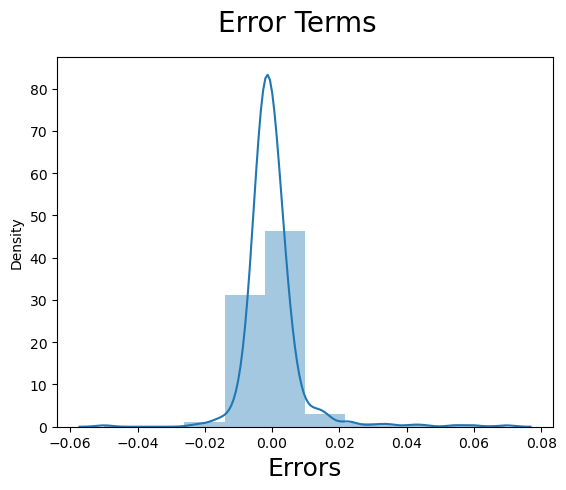

In [85]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 10)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

# Making Predictions

In [71]:
num_vars = ['temp','atemp','hum','cnt','windspeed']
scaler = Normalizer()
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [72]:
y_test = df_test.pop('cnt')
X_test = df_test

In [73]:
X_test_new = X_test[x_1.columns]

In [75]:
X_test_new = sm.add_constant(X_test_new)

In [76]:
y_pred = x_train_lm_2.predict(X_test_new)

# Model Evaluation

Text(0, 0.5, 'y_pred')

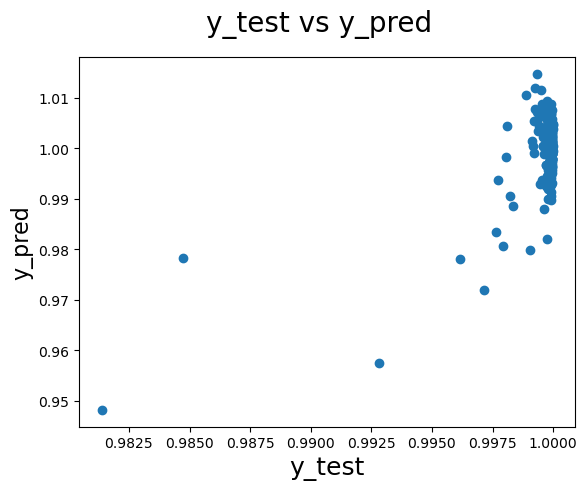

In [77]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-12.835159738353735

In [82]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

4.1178903134485604e-05

In [83]:
y_test

184    0.999917
535    0.999924
299    0.999458
221    0.999909
152    0.999935
         ...   
400    0.999703
702    0.999926
127    0.999863
640    0.999931
72     0.999641
Name: cnt, Length: 219, dtype: float64

In [84]:
y_pred

184    1.008799
535    0.994188
299    0.992954
221    0.998498
152    1.001277
         ...   
400    1.002778
702    0.996973
127    1.002137
640    0.998002
72     1.000142
Length: 219, dtype: float64